Optimal tour length for eil76: 545.39


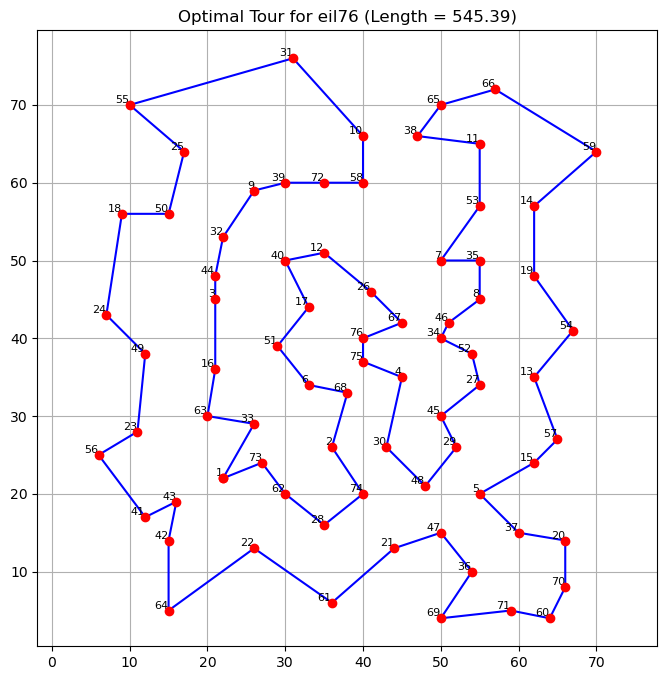

In [4]:
import matplotlib.pyplot as plt
import math
import os

# ---------- Step 1: Use Files from Current Directory ----------
def get_local_file(name, extension):
    local_path = os.path.join(".", f"{name}.{extension}")
    if not os.path.exists(local_path):
        raise FileNotFoundError(f"File not found: {local_path}")
    return local_path

# ---------- Step 2: Parse TSP Coordinates ----------
def parse_tsplib_coords(filepath):
    coords = []
    with open(filepath, 'r') as f:
        reading_nodes = False
        for line in f:
            if line.strip() == "NODE_COORD_SECTION":
                reading_nodes = True
                continue
            if line.strip() == "EOF":
                break
            if reading_nodes:
                parts = line.strip().split()
                if len(parts) >= 3:
                    coords.append((float(parts[1]), float(parts[2])))
    return coords

# ---------- Step 3: Parse Optimal Tour ----------
def parse_optimal_tour(filepath):
    tour = []
    with open(filepath, 'r') as f:
        reading_tour = False
        for line in f:
            if line.strip() == "TOUR_SECTION":
                reading_tour = True
                continue
            if line.strip() == "-1" or line.strip() == "EOF":
                break
            if reading_tour:
                tour.append(int(line.strip()) - 1)  # Convert to 0-index
    return tour

# ---------- Step 4: Compute Tour Distance ----------
def euclidean_distance(p1, p2):
    return math.hypot(p1[0] - p2[0], p1[1] - p2[1])

def compute_tour_length(coords, tour):
    total = 0.0
    for i in range(len(tour)):
        a = coords[tour[i]]
        b = coords[tour[(i + 1) % len(tour)]]  # Wrap around to first
        total += euclidean_distance(a, b)
    return total

# ---------- Step 5: Plot Tour ----------
def plot_tour(coords, tour, title="TSP Tour"):
    x = [coords[i][0] for i in tour] + [coords[tour[0]][0]]
    y = [coords[i][1] for i in tour] + [coords[tour[0]][1]]
    
    plt.figure(figsize=(8, 8))
    plt.plot(x, y, 'b-', linewidth=1.5)
    plt.scatter(x, y, c='red', zorder=5)
    
    for i, idx in enumerate(tour):
        xi, yi = coords[idx]
        plt.text(xi, yi, str(idx + 1), fontsize=8, ha='right', va='bottom')
    
    plt.title(title)
    plt.axis('equal')
    plt.grid(True)
    plt.show()

# ---------- Main Execution ----------
if __name__ == "__main__":
    name = "eil76"

    tsp_file = get_local_file(name, "tsp")
    tour_file = get_local_file(name, "opt.tour")

    coords = parse_tsplib_coords(tsp_file)
    tour = parse_optimal_tour(tour_file)

    distance = compute_tour_length(coords, tour)
    print(f"Optimal tour length for {name}: {distance:.2f}")
    plot_tour(coords, tour, f"Optimal Tour for {name} (Length = {distance:.2f})")
